<a href="https://colab.research.google.com/github/amanjha10/Web-Scraping/blob/master/Web_Scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
piano=[]

for i in range(2,11):
    url="https://www.flipkart.com/search?q=musical+keyboard+61+keys&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page="+str(i)
    r=requests.get(url)
    # print(r)

    soup=BeautifulSoup(r.text,"lxml")
    # print(soup)

    nextpage=soup.find("a",class_ ='_1LKTO3').get("href")

    # print(nextpage)
    cnp="https://www.flipkart.com"+nextpage

    products=soup.find_all('a',class_='s1Q9rs')
    price=soup.find_all('div',class_='_30jeq3')
    rating=soup.find_all('div',class_='_3LWZlK')
    discount=soup.find_all('div',class_='_3Ay6Sb')
    for j,x,y,z in zip(products,price,rating,discount):
        print(j.text,x.text,y.text,z.text)
        product=(j.text.split()[0])
        prices=(x.text.encode('ascii', 'ignore').decode('ascii')) # Here i was getting error as price was in indian rupess so we have used encode and decode().
        ratings=y.text
        discounts=z.text
        piano.append([product,prices,ratings,discounts])        
        
df=pd.DataFrame(piano, columns=['Products','Price','Star Rating','Discount'])
df.to_csv('piano.csv')        


SNM97 61 keys Electronic Piano Keyboard with LED Displa... ₹1,975 3 60% off
THELHARSATOYS Electronic Digital Piano Keyboard 61 Keys... ₹2,249 3.9 25% off
YAMAHA PSR E- 473 + CARRY CASE + DOUBLE PIPE STAND + LE... ₹20,999 4.4 8% off
YAMAHA F-52 + CARRY CASE + DOUBLE PIPE STAND + 5 LED LI... ₹8,999 5 14% off
YAMAHA PSR - I500 PSR-I500 Digital Portable Keyboard ₹22,499 4.6 9% off
YAMAHA PSR-I400 KB50 Digital Portable Keyboard ₹17,699 4.2 6% off
G&F YAMAHA E273 PSR, 61-Keys ,Dust Cover ,Stand Digital... ₹12,997 4.7 13% off
YAMAHA PSR- E473 Digital Portable Keyboard ₹19,199 3.6 3% off
DOMENICO 630-s Electronic Piano 61 Keys- Portable Piano... ₹2,599 3.9 48% off
SNM97 61 keys Electronic Piano Keyboard with LED Displa... ₹1,975 3.8 60% off
Drivya 61 keys Bigfun Electronic Piano Keyboard with LE... ₹1,975 3.7 34% off
NMII Electronic Piano Keyboard with 61 Keys with LED Di... ₹1,599 4.1 73% off
CLASSICMUSIC Best 61 Keys Keyboard Bag Keyboard Bag Key... ₹611 3.8 52% off
INCLUSSHOP Piano Keytops 

    Unnamed: 0       Products   Price  Star Rating Discount
0            0          SNM97   1,975          3.0  60% off
1            1  THELHARSATOYS   2,249          3.9  25% off
2            2         YAMAHA  20,999          4.4   8% off
3            3         YAMAHA   8,999          5.0  14% off
4            4         YAMAHA  22,499          4.6   9% off
5            5         YAMAHA  17,699          4.2   6% off
6            6            G&F  12,997          4.7  13% off
7            7         YAMAHA  19,199          3.6   3% off
8            8       DOMENICO   2,599          3.9  48% off
9            9          SNM97   1,975          3.8  60% off
10          10         Drivya   1,975          3.7  34% off
11          11           NMII   1,599          4.1  73% off
12          12   CLASSICMUSIC     611          3.8  52% off
13          13     INCLUSSHOP   1,949          4.6  61% off
14          14            TMA  26,799          4.3   7% off
15          15         Roland  23,499   

<ipython-input-42-b2fce3e7abaf>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Price'] = pd.to_numeric(data['Price'].str.replace(',', ''))


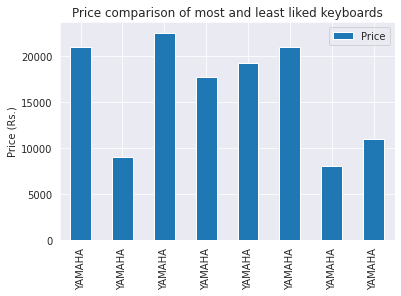

In [ ]:

# read the data frame from the csv file
dat=pd.read_csv('piano.csv')
data = dat.head(20)
print(data)

# Keyboard that are given rating of 5

five_star = data[data['Star Rating']==5]
print(five_star['Products'])

# From this we can get all the products that had got 5 star rating 


print("**************************************************************************************************")

# Here we are tring to get the most liked piano  

# Assumption : According to the review deciding the best piano 

data['Price'] = pd.to_numeric(data['Price'].str.replace(',', ''))
most_liked = data.sort_values(by=['Star Rating'], ascending=False).iloc[0]


selected_df = data[data['Products'].isin([most_liked['Products'],])]

fig, ax = plt.subplots()
selected_df.plot.bar(x='Products', y='Price', ax=ax)
ax.set_xlabel('')
ax.set_ylabel('Price (Rs.)')
ax.set_title('Price comparison of most and least liked keyboards')
plt.show()


# From below graph we can clearly see that yamaha has got the best review and star rating so on that basis we can say that yamaha brand keyboard are best.







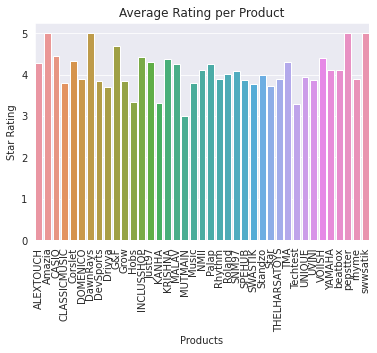

In [ ]:
# AVERAGE RATING PER PRODUCT


df['Star Rating'] = df['Star Rating'].astype('float')
avg_rating = df.groupby('Products')['Star Rating'].mean().reset_index()

sns.barplot(data=avg_rating, x='Products', y='Star Rating')
plt.xticks(rotation=90)
plt.title('Average Rating per Product')
plt.show()


# Here we can see that Amazia Brand is leading in terms of average star Rating and Standzo,Beatbox brand is having the lowest star rating.